# Econometrics project : Part1

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import t
import statsmodels.api as sm
from scipy.stats import f
from mpl_toolkits.mplot3d import axes3d  
from matplotlib import cm

### 1)

In [77]:
temp_file = pd.read_csv('MROZ.txt', delim_whitespace = True, names = np.array(['inlf', 'hours', 'kidslt6', 'kidsge6', 
'age', 'educ', 'wage', 'repwage', 'hushrs', 'husage', 'huseduc', 'huswage', 'faminc', 'mtr', 'motheduc', 'fatheduc',
'unem', 'city', 'exper', 'nwifeinc', 'lwage', 'expersq']))

file=temp_file[temp_file.wage!='.']
file

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.354,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1,680,0,5,36,10,2.3118,0.00,3430,43,...,19772,0.7215,7,7,7.5,0,2,18.199980,.8380265,4
424,1,2450,0,1,40,12,5.3061,6.50,2008,40,...,35641,0.6215,7,7,5.0,1,21,22.641060,1.668857,441
425,1,2144,0,2,43,13,5.8675,0.00,2140,43,...,34220,0.5815,7,7,7.5,1,22,21.640080,1.769429,484
426,1,1760,0,1,33,12,3.4091,3.21,3380,34,...,30000,0.5815,12,16,11.0,1,14,23.999980,1.226448,196


In [79]:
#Etant donné qu'il y avait des points dans les valeurs initiales, wage et lwage ont été interprétés comme des str
file.wage=pd.to_numeric(file.wage)
file.lwage=pd.to_numeric(file.lwage)

### 2) Faire les statistiques descriptives du salaire, de l’âge et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon.

In [6]:
print("Pour l'ensemble des femmes")
print('Number :', file.wage.count())
print(" ")

print("SALAIRE")
print('Mean :', file.wage.mean())
print('Median :', file.wage.median())
print('Max :', max(file.wage))
print('Min :', min(file.wage))
print('Stand. dev. :', np.std(file.wage))
print(" ")

print("AGE")
print('Mean :', file.age.mean())
print('Median :', file.age.median())
print('Max :', max(file.age))
print('Min :', min(file.age))
print('Stand. dev. :', np.std(file.age))
print(" ")

print("EDUCATION")
print('Mean :', file.educ.mean())
print('Median :', file.educ.median())
print('Max :', max(file.educ))
print('Min :', min(file.educ))
print('Stand. dev. :', np.std(file.educ))
print("\n")

########

print ("Pour les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon")
bis = file[file.huswage>=file.huswage.median()]
print('Number :', bis.wage.count())
print(" ")

print("SALAIRE")
print('Mean :', bis.wage.mean())
print('Median :', bis.wage.median())
print('Max :', max(bis.wage))
print('Min :', min(bis.wage))
print('Stand. dev. :', np.std(bis.wage))
print(" ")

print("AGE")
print('Mean :', bis.age.mean())
print('Median :', bis.age.median())
print('Max :', max(bis.age))
print('Min :', min(bis.age))
print('Stand. dev. :', np.std(bis.age))
print(" ")

print("EDUCATION")
print('Mean :', bis.educ.mean())
print('Median :', bis.educ.median())
print('Max :', max(bis.educ))
print('Min :', min(bis.educ))
print('Stand. dev. :', np.std(bis.educ))
print("\n")

########

print("Pour les femmes dont le salaire du mari est inférieure à la médiane de l’échantillon")
bis = file[file.huswage<=file.huswage.median()]
print('Number :', bis.wage.count())
print(" ")

print("SALAIRE")
print('Mean :', bis.wage.mean())
print('Median :', bis.wage.median())
print('Max :', max(bis.wage))
print('Min :', min(bis.wage))
print('Stand. dev. :', np.std(bis.wage))
print(" ")

print("AGE")
print('Mean :', bis.age.mean())
print('Median :', bis.age.median())
print('Max :', max(bis.age))
print('Min :', min(bis.age))
print('Stand. dev. :', np.std(bis.age))
print(" ")

print("EDUCATION")
print('Mean :', bis.educ.mean())
print('Median :', bis.educ.median())
print('Max :', max(bis.educ))
print('Min :', min(bis.educ))
print('Stand. dev. :', np.std(bis.educ))

Pour l'ensemble des femmes
Number : 428
 
SALAIRE
Mean : 4.177681542056075
Median : 3.4819
Max : 25.0
Min : 0.1282
Stand. dev. : 3.3064129736891417
 
AGE
Mean : 41.97196261682243
Median : 42.0
Max : 60
Min : 30
Stand. dev. : 7.712058701745161
 
EDUCATION
Mean : 12.658878504672897
Median : 12.0
Max : 17
Min : 5
Stand. dev. : 2.28270430173602


Pour les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon
Number : 214
 
SALAIRE
Mean : 4.896822429906542
Median : 3.8464
Max : 25.0
Min : 0.1616
Stand. dev. : 4.032151886865032
 
AGE
Mean : 42.27570093457944
Median : 43.0
Max : 59
Min : 30
Stand. dev. : 7.371558644217608
 
EDUCATION
Mean : 13.242990654205608
Median : 12.0
Max : 17
Min : 5
Stand. dev. : 2.353526371870564


Pour les femmes dont le salaire du mari est inférieure à la médiane de l’échantillon
Number : 214
 
SALAIRE
Mean : 3.4585406542056094
Median : 2.9718
Max : 18.267
Min : 0.1282
Stand. dev. : 2.1382603754579974
 
AGE
Mean : 41.66822429906542
Median : 41.

On constate que les salaires des femmes semblent suivre celui de leur mari. En effet, les femmes dont le mari a un salaire supérieur à la médiane ont en moyenne un salaire plus élevé et inversement. L'âge et l'éducation, quant à eux, semblent être indépendant du salaire du mari. 

### 3) Faire l'histogramme de la variable wage. Calculer le log de wage et faire l'histogramme. Comparer les deux histogrammes et commenter.

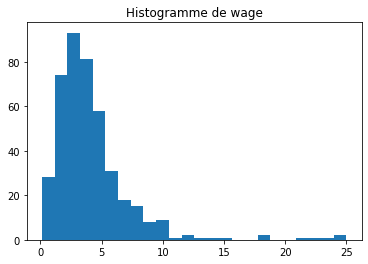

In [326]:
plt.hist(file.wage, bins=24)
plt.title('Histogramme de wage')
plt.show()

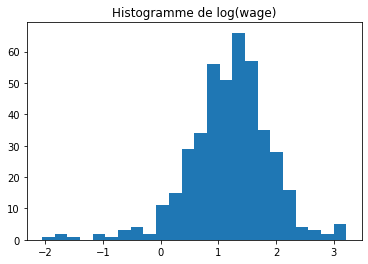

In [327]:
plt.hist(file.lwage, bins=24)
plt.title('Histogramme de log(wage)')
plt.show()

Si on se représente les courbes de tendance des deux histogrammes, la variable wage semble avoir une distribution suivant une loi exponentielle et lwage une loi normale. Il est plus facile de travailler avec une loi normale. Il serait donc judicieux d'utiliser log(wage) afin d'étudier cette variable. 

### 4) Calculer les corrélations motheduc et fatheduc. Commenter. Il y a-t-il un problème de multicolinéarité si l'on utilise ces variables comme variables explicatives ?

In [11]:
print("Coefficient de corrélation : ", np.corrcoef(file.motheduc, file.fatheduc)[0,1])

Coefficient de corrélation :  0.554063218431168


Le coefficient de corrélation est assez distant de 1. Nous pouvons donc considérer motheduc et fatheduc comme linéairement indépendantes et il ne devrait pas y avoir de problème de multicolinéarité. 

### 5) Faire un graphique en nuage de point entre wage et educ, wage et exper, wage et fatheduc. Commenter. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

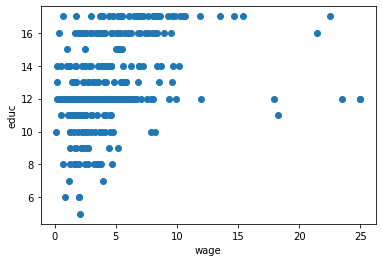

In [13]:
plt.scatter(file.wage, file.educ)
plt.xlabel('wage')
plt.ylabel('educ')
plt.show()

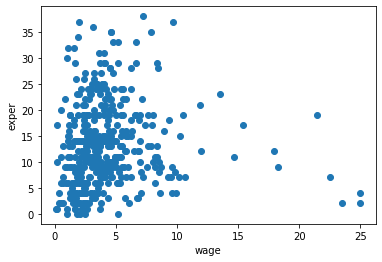

In [14]:
plt.scatter(file.wage, file.exper)
plt.xlabel('wage')
plt.ylabel('exper')
plt.show()

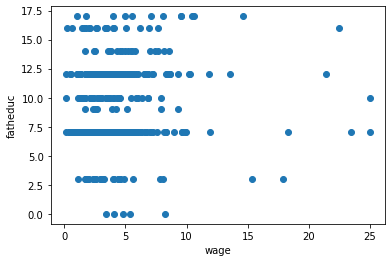

In [15]:
plt.scatter(file.wage, file.fatheduc)
plt.xlabel('wage')
plt.ylabel('fatheduc')
plt.show()

Il ne s'agit pas d'un effet "toute chose étant égale par ailleurs". En effet, si on considère la variable wage et une autre variable y, pour deux valeurs différentes du couple (wage, y), de nombreuses autres variables qui interviennent dans la valeur de wage varient également.

### 6) Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? Expliquer le biais de variable omise.

L'hypothèse fondamentale pour des estimateurs non biaisés est que l'espérance de l'erreur (différence entre l'estimation et la vraie valeur) doit être nulle.
<p> Il y a un biais de variable omise quand une variable déterminante pour l'explication d'une variable dépendante n'est pas représentée dans le modèle. </p>

### 7) Faire la régression de wage en utilisant les variables explicatives city, educ, exper, nwifeinc, kidslt6, kidsge6 et une constante. Commenter l'histogramme des résidus.

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     10.23
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.41e-10
Time:                        17:17:58   Log-Likelihood:                -1090.0
No. Observations:                 428   AIC:                             2194.
Df Residuals:                     421   BIC:                             2222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4035      0.963     -2.495      0.0

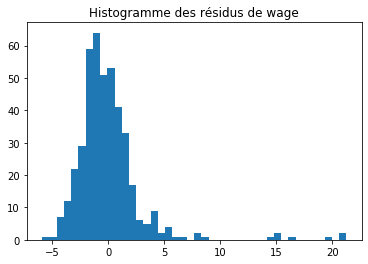

In [330]:
y=file.wage
s=np.shape(y)
const=np.ones(s)

X=np.column_stack((const, file.city, file.educ, file.exper, file.nwifeinc, file.kidslt6, file.kidsge6))

model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

u=results.resid
plt.hist(u,'auto')
plt.title('Histogramme des résidus de wage')
plt.show()

A première vue, les résidus semblent distribués selon une loi normale centrée mais on observe des valeurs extrêmes sur la droite. L'estimateur n'est donc pas sans biais. De plus, la présence de ses valeurs extrêmes a pour conséquence une grande variance ce qui traduit le manque de qualité de la régression.

### 8) Faire la régression de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsge6. Comparer l’histogramme obtenu à celui de la question 7.

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           2.00e-13
Time:                        15:56:20   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

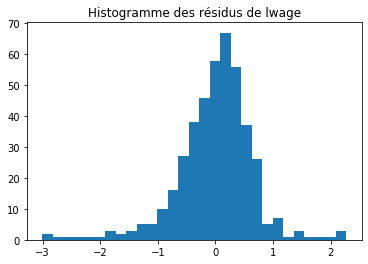

In [248]:
y=file.lwage
s=np.shape(y)
const=np.ones(s)

X=np.column_stack((const, file.city, file.educ, file.exper, file.nwifeinc, file.kidslt6, file.kidsge6))

model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

u=results.resid
plt.hist(u,'auto')
plt.title('Histogramme des résidus de lwage')
plt.show()

Les résidus pour cette régression semblent plus se répartir selon une loi normale centrée. On peut donc supposer l'estimateur sans biais et la régression OLS adaptée. 

### 9) Tester l'hypothèse de non significativité de nwifeinc avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commenter les p-values.

In [163]:
#t.sf(x,df) qui calcule l'aire  a droite de x sous la distribution de la loi de student avec df degrés de liberté (p-value)

n,k=np.shape(X)
ddl=n-k

#Calcul de la statistique de student
beta, std_err = results.params, results.bse
student=beta[4]/std_err[4]

print("p-value : ", t.sf(np.abs(student),ddl)*2)

p-value :  0.1434079820251398


p-value > 0.1 donc on ne peut  rejeter l'hypothèse H0 : "$\beta_{nwifeinc}=0$" ni à 1%, ni à 5%, ni à 10%. 
<p> En réalité, il faudrait un seuil de significativité d'au moins 14,35% pour pouvoir rejeter cette hypothèse. </p>

### 10) Tester l’hypothèse que le coefficient associé à nwifeinc est égal à 0.01 avec un seuil de significativité de 5% (test alternatif des deux côtés).

In [164]:
print("p-value : ", t.sf((beta[4]-0.01)/std[4],n-k)*2)

p-value :  1.258558473404222


p-value > 0.05 donc on ne peut pas rejeter l'hypothèse H0 : "$\beta_{nwifeinc}=0.01$" à 5%. 

### 11) Tester l’hypothèse jointe que le coefficient de nwifeinc est égal à 0.01 et que celui de city est égal à 0.05.
Nous sommes ici dans le cas d'un test multiple. Nous allons donc utiliser, non pas des statistiques de Student, mais une statistique de Fisher.

In [177]:
#Somme des carrés des erreurs du modèle non contraint 
SSR0=u.T@u

In [182]:
#Calcul de la somme des carrés des erreurs du modèle contraint 
y=file.lwage - 0.01*file.nwifeinc - 0.05*file.city
X=np.column_stack((const, file.educ, file.exper, file.kidslt6, file.kidsge6))

model=sm.OLS(y,X)
results = model.fit()

u=results.resid
SSR1=u.T@u

#Calcul de la statistique de Fisher 
print("F statistic : ", ((SSR1-SSR0)/SSR0)*(ddl/2))
print("p-value : ", f.sf(F,2,ddl))

F statistic :  1.3370704454928417
p-value :  0.2637267136252716


p-value > 0.05 donc on ne peut pas rejeter l'hypothèse H0 : "$\beta_{nwifeinc}=0.01$ et $\beta_{city}=0.05 $" à 5%. 

### 12) Faire une représentation graphique de la manière dont le salaire augmente avec l’éducation et l’expérience professionnelle. Commenter.

In [331]:
#On réalise la régression de wage en fonction de educ et exper 

y=file.wage
X=np.column_stack((const, file.educ, file.exper))

model=sm.OLS(y,X)
results = model.fit()


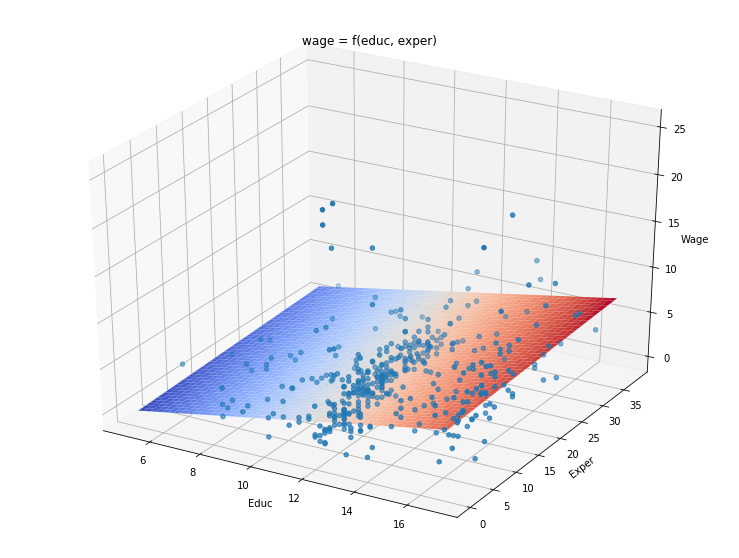

In [323]:
# Tracé du résultat en 3D

fig = plt.figure(figsize=(13,10))
ax = fig.gca(projection='3d')  

#Tracé réel à parti des observations
ax.scatter(file.educ, file.exper, file.wage, 'o') 

#Tracé des résultats obtenus avec la régression
x=np.arange(min(file.educ), max(file.educ), 0.01)
y=np.arange(min(file.exper), max(file.exper), 0.01)
X,Y=np.meshgrid(x,y)
wage=results.params[0] + X*(results.params[1]) + Y*(results.params[2])
ax.plot_surface(X, Y, wage, cmap=cm.coolwarm)

plt.title("wage = f(educ, exper)")
ax.set_xlabel('Educ')
ax.set_ylabel('Exper')
ax.set_zlabel('Wage')
plt.show()

La modélisation ne permet pas d'expliquer toutes les variations du salaire mais met en évidence sa corrélation avec l'éducation et l'expérience. Nous pouvons observer que pour un même niveau d'éducation, le salaire augmente avec l'expérience et de même, à expérience égale, le salaire augmente avec l'éducation.
En moyenne, nous retrouvons les salaires les plus élevés là où l'éducation et l'expérience sont conjointement les plus importantes et inversement. 

### 13) Tester l’égalité des coefficients associés aux variables kidsge6 et kidslt6. Interpréter.

In [274]:
y=file.lwage

#On teste  theta = beta(kidsge6) - beta(kidslt6) = 0
#Cela revient à estimer y selon kidslt6 et kidsge6+kidslt6 (et les autres coeff)
#theta est le coefficient devant kidslt6
X=np.column_stack((const, file.city, file.educ, file.exper, file.nwifeinc, file.kidslt6, file.kidsge6+file.kidslt6))

model=sm.OLS(y,X)
results = model.fit()

beta, std_err = results.params, results.bse
student=beta[5]/std_err[5]

print("p-value : ", t.sf(np.abs(student),ddl)*2)

p-value :  0.7102679748433285


p-value > 0.05 donc on ne peut pas rejeter l'hypothèse H0 : "$\beta_{kidsge6}=\beta_{kidslt6}$" à 5%. 

### 14) En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Déterminer la ou les sources d’hétéroscédasticité et corriger avec les méthodes vues en cours. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

In [273]:
y=file.wage
X=np.column_stack((const, file.city, file.educ, file.exper, file.nwifeinc, file.kidslt6, file.kidsge6))

model=sm.OLS(y,X)
results = model.fit()

#On effectue la régression des résidus au carré en fonction des variables explicatives 
#Et on teste l'hypothèse que les coefficients devant ces derniers sont tous nuls
y=results.resid**2

model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

print("F statistic : 1.593")
print("p-value : ", f.sf(1.593,6,ddl))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.593
Date:                Thu, 08 Dec 2022   Prob (F-statistic):              0.148
Time:                        16:29:22   Log-Likelihood:                -2207.4
No. Observations:                 428   AIC:                             4429.
Df Residuals:                     421   BIC:                             4457.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4856     13.111      0.113      0.9

p-value > 0.05 donc on ne peut pas rejeter l'hypothèse H0 : "Il y a homoscédasticité" à 5%. 

### 15) Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Commenter et donner les p-valeurs.

In [271]:
#On considère les femmes âgées de 43 ans et plus et celles âgées de strictement moins de 43 ans 
file1=file[file.age<43]
file2=file[file.age>=43]

y1=file1.lwage
s1=np.shape(y1)
const1=np.ones(s1)
y2=file2.lwage
s2=np.shape(y2)
const2=np.ones(s2)

X1=np.column_stack((const1, file1.city, file1.educ, file1.exper, file1.nwifeinc, file1.kidslt6, file1.kidsge6))
X2=np.column_stack((const2, file2.city, file2.educ, file2.exper, file2.nwifeinc, file2.kidslt6, file2.kidsge6))

model=sm.OLS(y1,X1)
results1 = model.fit()
u1=results1.resid
SSR1=u1.T@u1

model=sm.OLS(y2,X2)
results2 = model.fit()
u2=results2.resid
SSR2=u2.T@u2

#Réalisation d'un test de Chow
F=(SSR0-(SSR1+SSR2))/(SSR1+SSR2)*(len(file1)+len(file2)-14)/7
print("F statistics : ", F)
print("p-value : ", f.sf(F,7,ddl))

F statistics :  1.1850874941083187
p-value :  0.30992856833172183


p-value > 0.05 donc on ne peut pas rejeter l'hypothèse H0 : "Il y a une de structure stable entre les deux sous-ensembles de données" à 5%. 

### 16) Refaire la question 15 en supposant que seuls les rendements de l’éducation et de l’expérience professionnelle changent selon l’âge de la femme. Formuler l’hypothèse H0 et la tester. Donner la p-valeur.
L'hypothèse H0 revient à supposer que les coefficients "$\beta_{city}, \beta_{nwifeinc}, \beta_{kidslt6}, \beta_{kidsge6}$" sont égaux dans le modèle des femmes de moins de 43 ans et dans celui des femmes de plus de 43 ans.

In [310]:
y = file.lwage

#On introduit des variables d'intéraction, et on teste leur nullité
educ_old = file.educ*(file.age>=43)
exper_old = file.exper*(file.age>=43)

X = np.column_stack((const, educ_old, exper_old, file.city, file.educ, file.exper, file.nwifeinc, file.kidslt6, file.kidsge6))
model=sm.OLS(y, X)
results=model.fit()

u = results.resid
SSR=u.T@u
n,k = np.shape(X)

#Le modèle contraint est le modèle de base de la question 8
F=((SSR0-SSR)/SSR)*((n-k)/2)

print("F statistics : ", F)
print("p-value : ", f.sf(F,2,n-k))

F statistics :  1.8203878821599664
p-value :  0.16324150632491216


p-value > 0.05 donc on ne peut pas rejeter l'hypothèse H0 : "$\beta_{experold}=0$ et $\beta_{educold}=0 $"  à 5%.